# Medical Data Visualizer (FreeCodeCamp - Data Analysis with python projet #3)

Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

By each number in the medical_data_visualizer.py file, add the code from the associated instruction number below.

    1) Import the data from medical_examination.csv and assign it to the df variable.
    
    2) Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
    
    3) Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.
    
    4) Draw the Categorical Plot in the draw_cat_plot function.
    
    5) Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.
    
    6) Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    
    7) Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import: sns.catplot().
    
    8) Get the figure for the output and store it in the fig variable.
    
    9) Do not modify the next two lines.
    
    10) Draw the Heat Map in the draw_heat_map function.
    
    11) Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:
        diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
        height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
        height is more than the 97.5th percentile
        weight is less than the 2.5th percentile
        weight is more than the 97.5th percentile
    12) Calculate the correlation matrix and store it in the corr variable.
    
    13) Generate a mask for the upper triangle and store it in the mask variable.
    
    14) Set up the matplotlib figure.
    
    15) Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap().
    
    16) Do not modify the next two lines.


In [1]:
# --- Import des bibliothèques python ---

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1) Import the data from medical_examination.csv and assign it to the df variable.

df = pd.read_csv('medical_examination.csv')

In [3]:
df.columns

Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [4]:
# 2) Add an overweight column to the data. To determine if a person is overweight, 
# first calculate their BMI by dividing their weight in kilograms by the square of their height in meters.
# If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

df['overwheight'] = (df['weight'] / (df['height'] / 100)**2 >25).astype(int)

In [5]:
# 3) Normalize data by making 0 always good and 1 always bad.
# If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.

df['cholesterol'] = (df['cholesterol'] > 1).astype(int)

df['gluc'] = (df['gluc'] > 1).astype(int)

In [6]:
# 4) Draw the Categorical Plot in the draw_cat_plot function.

def draw_cat_plot():
    df_cat = pd.melt(df, id_vars = ['cardio'], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active','overwheight'])

    df_cat = df_cat.groupby(['cardio', "variable", "value"]).size().reset_index(name="total")

    # Create the catplot
    sns.catplot(data=df_cat, 
                x="variable", 
                y="total", 
                hue="value", 
                col="cardio", 
                kind="bar")

    plt.tight_layout()
    plt.show()

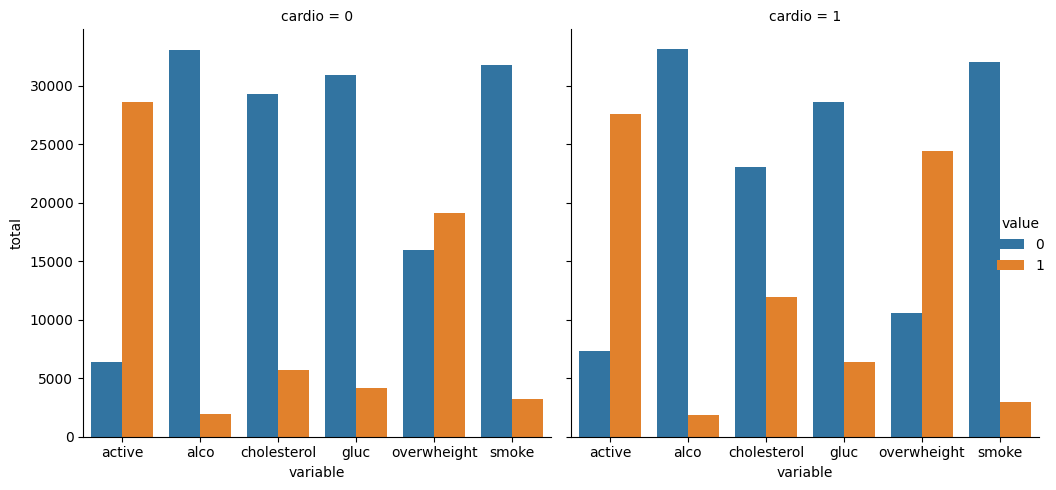

In [7]:
draw_cat_plot()

In [14]:
# 10) Draw the Heat Map in the draw_heat_map function.

def draw_heat_map():
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]


    corr = df_heat.corr()

    mask = np.triu(np.ones_like(corr, dtype = bool))

    # Set up the matplotlib figure
    plt.figure(figsize=(12, 10))

    # Draw the heatmap
    sns.heatmap(
        corr, 
        mask=mask, 
        annot=True, 
        fmt='.1f', 
        center=0, 
        square=True, 
        linewidths=0.5, 
        cmap='coolwarm'
    )

    plt.show()

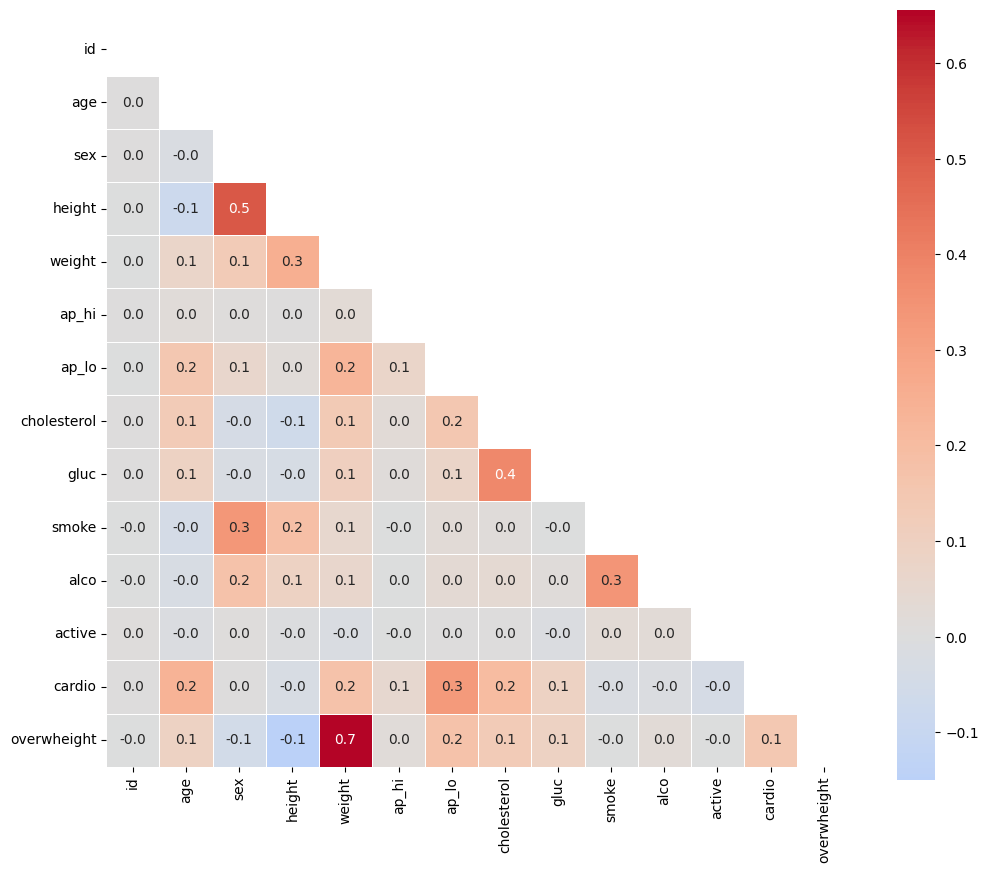

In [15]:
draw_heat_map()